In [217]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans,AgglomerativeClustering

from scipy.cluster.hierarchy import linkage

from sklearn.metrics import accuracy_score,silhouette_score

In [165]:
df= pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [166]:
# Revenue column acts as class label  

# Understanding the data

In [167]:
df.shape

(12330, 18)

In [168]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [169]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [170]:
# analysis each column

print(df.SpecialDay.nunique())

print(df.SpecialDay.unique())

6
[0.  0.4 0.8 1.  0.2 0.6]


In [171]:
print(df.OperatingSystems.nunique())

print(df.OperatingSystems.unique())

8
[1 2 4 3 7 6 8 5]


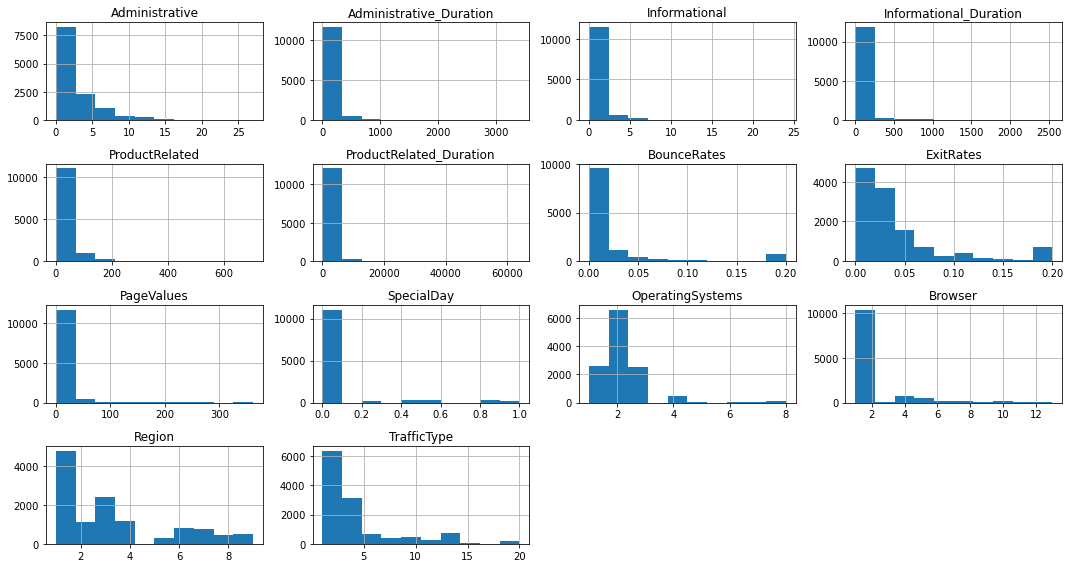

In [172]:
plt.rcParams['figure.figsize']=[15,8]
df.hist()
plt.tight_layout()
plt.show()

In [173]:
print(df.Browser.nunique())

print(df.Browser.unique())

13
[ 1  2  3  4  5  6  7 10  8  9 12 13 11]


In [174]:
print(df.Region.nunique())

print(df.Region.unique())

9
[1 9 2 3 4 5 6 7 8]


In [175]:
print(df.TrafficType.nunique())

print(df.TrafficType.unique())

20
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20]


In [176]:
df.describe(include='object')

,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


In [177]:
print(df.VisitorType.nunique())

print(df.VisitorType.unique())

3
['Returning_Visitor' 'New_Visitor' 'Other']


In [178]:
print(df.Month.nunique())

print(df.Month.unique())

10
['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']


In [179]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [180]:
# observed booliean type of data for weekend and Revenue columns 
# coverting data type to object 
df.Weekend=df.Weekend.astype('object')
df.Revenue=df.Revenue.astype('object')

# Missing value treatment

In [181]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [182]:
# No missing values observed in the data

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

# Outlier treatment

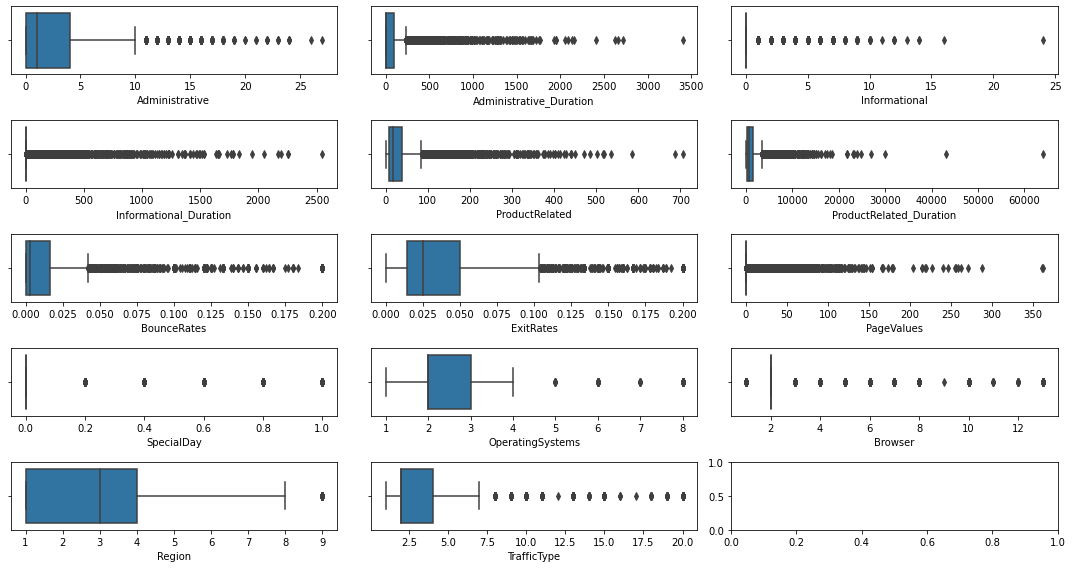

In [184]:
fig,ax=plt.subplots(5,3,figsize=(15,8))

for var, subplot in zip(df.describe().columns,ax.flatten()):
    sns.boxplot(data=df,x=var,ax=subplot)
plt.tight_layout()
plt.show()

In [185]:
# observed outliers in the given data

In [186]:
df.shape

(12330, 18)

In [187]:
#Q1=df.quantile(.25)
#Q3=df.quantile(.75)

#IQR=Q3-Q1

#df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

#df.shape

In [188]:
# we are loosing lots of data by treating outliers, hence we are not performing that

In [189]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [190]:
    df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [191]:
# droping of vistortype , weekend, revenue classification variables as we need to find them 

In [192]:
df.drop(columns=['VisitorType','Weekend','Revenue'],inplace=True)

In [94]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4


In [194]:
df.Month.unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [195]:
df.Month.replace({
   'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9,
       'Dec' :12
},inplace=True)

In [196]:
df.Month.unique()

array([ 2,  3,  5, 10,  6,  7,  8, 11,  9, 12], dtype=int64)

In [197]:
features=df.copy()

# scaling the features

In [198]:
ss= StandardScaler()

features_scaled=pd.DataFrame(ss.fit_transform(features),columns=features.columns)
features_scaled.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.665924,-1.233426,-0.790293,-0.894178,-0.762629
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-1.665924,-0.136078,-0.207952,-0.894178,-0.514182
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.665924,2.058618,-0.790293,2.437081,-0.265735
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,-1.665924,0.961270,-0.207952,-0.477771,-0.017289
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,-1.665924,0.961270,0.374389,-0.894178,-0.017289


# K means clustering

## finding optimum number of clusters

In [199]:
wcss  = []

for i in range(1,8):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

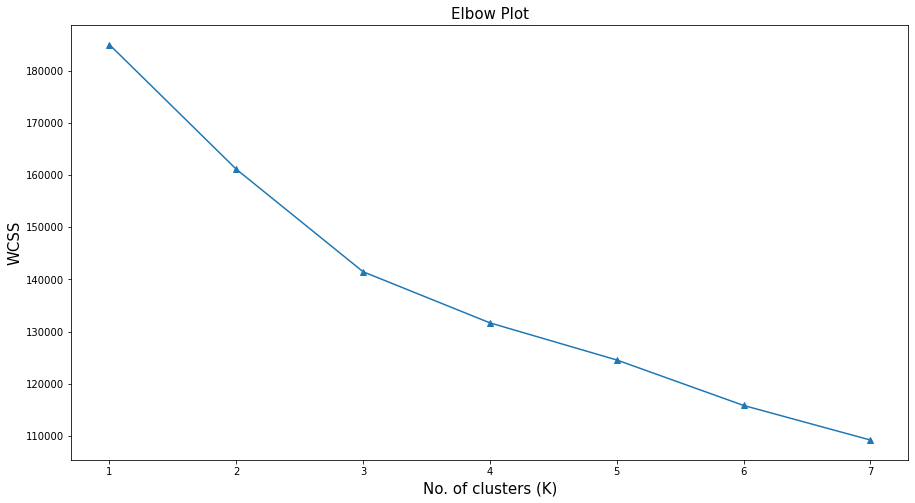

In [202]:
# visualize the elbow plot to get the optimal value of K
plt.plot(range(1,8), wcss,marker='^')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# display the plot
plt.show()

In [203]:
# import the 'KneeLocator' 
from kneed.knee_locator import KneeLocator

# pass the number of clusters and corresponding WCSS to parameters 'x' and 'y' respectively
# pass the type of the curve to the parameter 'curve'
# pass the direction of the data points to the parameter 'direction' 
k = KneeLocator(x  = range(1,8), y = wcss, curve = 'convex', direction = 'decreasing')

# 'elbow' returns the corresponding x-axis value at the maximum curvature 
k.elbow

3

In [ ]:
# Using elbow point, we could observe the optimum number of cluster to be 3

In [ ]:
# Using Shilouette score

In [206]:
# create a list for different values of K
n_clusters = [2, 3, 4, 5, 6, 7]

for K in n_clusters :
    cluster = KMeans (n_clusters = K, random_state = 10)
    predict = cluster.fit_predict(features_scaled)
    
    score = silhouette_score(features_scaled, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 2, silhouette score is 0.29677927169343943)
For n_clusters = 3, silhouette score is 0.2898365218422625)
For n_clusters = 4, silhouette score is 0.12761353647646417)
For n_clusters = 5, silhouette score is 0.12677026017625243)
For n_clusters = 6, silhouette score is 0.13685951388597045)
For n_clusters = 7, silhouette score is 0.14554468830553058)


In [ ]:
# from silhouette scores the optimum number of cluster to be found is 2

# Buliding the model - K Means

In [210]:
# build a K-Means model for K = 3
K_model = KMeans(n_clusters= 3, random_state= 10)

K_model.fit(features_scaled)

KMeans(n_clusters=3, random_state=10)

In [211]:
# add a column 'Kmeans_label' to the original dataframe
# the 'labels_' returns the cluster number for each observation
df['Kmeans_label'] = K_model.labels_

# use the 'head()' to display top five rows
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Kmeans_label
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,0


In [212]:
#Check the size of each cluster

df['Kmeans_label'].value_counts()

0    9634
2    1638
1    1058
Name: Kmeans_label, dtype: int64

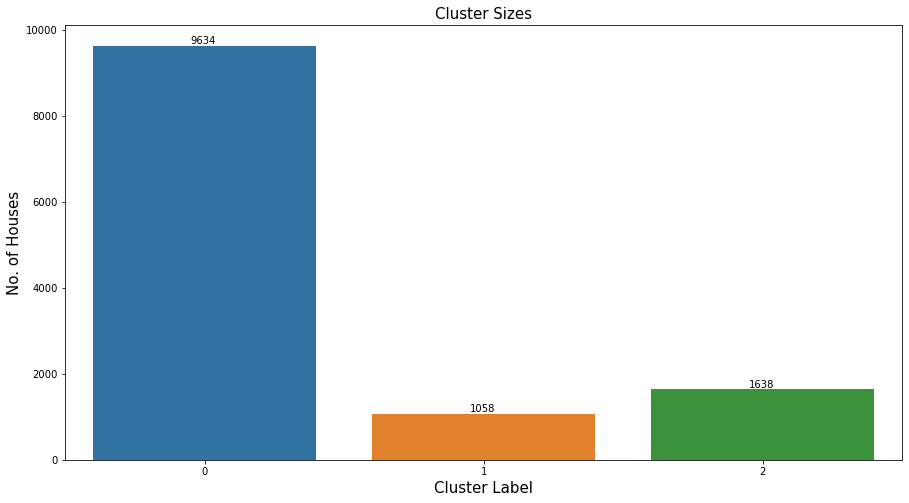

In [214]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= df, x = 'Kmeans_label')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Cluster Label', fontsize = 15)
plt.ylabel('No. of Houses', fontsize = 15)

# add values in the graph
# 'x' and 'y' assigns the position to the text
# 's' represents the text on the plot
plt.text(x = -0.05, y = np.unique(K_model.labels_, return_counts=True)[1][0] + 50, 
         s = np.unique(K_model.labels_, return_counts=True)[1][0])

plt.text(x = 0.95, y = np.unique(K_model.labels_, return_counts=True)[1][1] + 50, 
         s = np.unique(K_model.labels_, return_counts=True)[1][1])

plt.text(x = 1.95, y = np.unique(K_model.labels_, return_counts=True)[1][2] + 50, 
         s = np.unique(K_model.labels_, return_counts=True)[1][2])

# display the plot
plt.show()

In [226]:
# Analysis using centroids formed by the clusters 
unscaled_centers = pd.DataFrame(ss.inverse_transform(K_model.cluster_centers_), 
                                columns = features.columns)      


unscaled_centers

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType
0,1.714034,51.279461,0.213722,8.080026,23.853436,872.606926,0.009114,0.032082,5.884240e+00,0.061491,7.558231,2.118850,2.384679,3.200851,4.048059
1,0.053875,1.518463,0.016068,0.091871,3.123819,58.614883,0.165908,0.179712,-3.552714e-15,0.113233,6.800567,2.183365,2.323251,3.049149,5.051985
2,7.311355,305.775709,2.523199,211.907506,96.544567,3823.266923,0.006282,0.019462,9.722700e+00,0.027595,8.753358,2.115995,2.216728,2.896215,3.561661


#### INFERENCE: 
    - from looking at the cetroids of different clusters above, the average administrative, duration is certainly different for different clusters and are very far apart. 

# Using Hierachial clustering 

## Finding the optimum cluster size 

In [215]:
# instantiate linkage object with scaled data and consider 'ward' linkage method 
link_mat = linkage(features_scaled, method = 'ward')     

# print first 10 observations of the linkage matrix 'link_mat'
print(link_mat[0:10])

[[4.2240e+03 4.4890e+03 0.0000e+00 2.0000e+00]
 [5.7700e+02 1.8960e+03 0.0000e+00 2.0000e+00]
 [3.3000e+02 4.8300e+02 0.0000e+00 2.0000e+00]
 [5.4000e+02 1.2332e+04 0.0000e+00 3.0000e+00]
 [8.7200e+02 1.2333e+04 0.0000e+00 4.0000e+00]
 [1.2130e+03 1.2334e+04 0.0000e+00 5.0000e+00]
 [1.3890e+03 1.2335e+04 0.0000e+00 6.0000e+00]
 [1.4360e+03 1.2336e+04 0.0000e+00 7.0000e+00]
 [2.0560e+03 1.2337e+04 0.0000e+00 8.0000e+00]
 [2.6190e+03 3.8910e+03 0.0000e+00 2.0000e+00]]


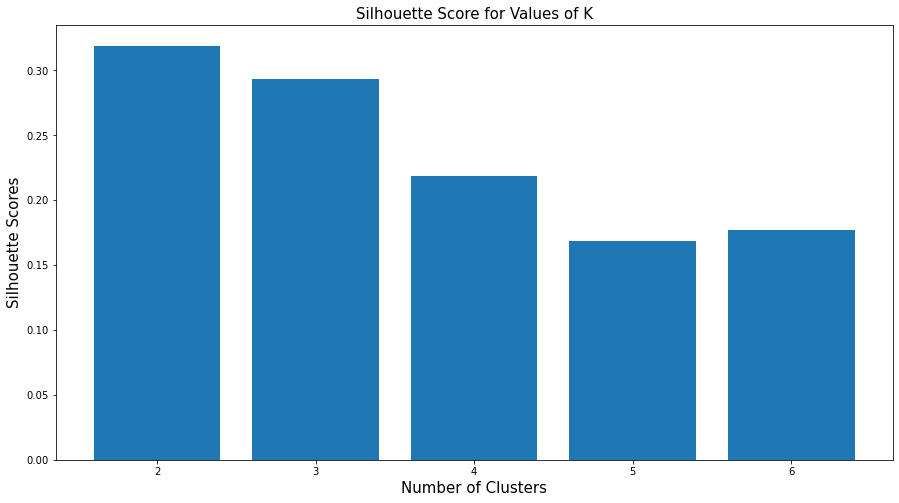

In [218]:
# consider different values of K
K = [2, 3, 4, 5, 6]

# consider an empty list tot store the silhouette score
silhouette_scores = [] 

# consider a for loop to perform clustering for different values of K
for i in K:
    
    # instantiate clustering for each value of K
    # use the 'ward' linkageF method (same as the dendrogram)
    hierar_model = AgglomerativeClustering(n_clusters = i, linkage = 'ward') 
    
    # calculate the silhouette score and append to the list 'silhouette_scores'
    silhouette_scores.append(silhouette_score(features_scaled, hierar_model.fit_predict(features_scaled))) 
    
# plot the silhouette score for different K
plt.bar(K, silhouette_scores) 

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Silhouette Score for Values of K', fontsize = 15)
plt.xlabel('Number of Clusters', fontsize = 15) 
plt.ylabel('Silhouette Scores', fontsize = 15)

# display the plot
plt.show()

In [ ]:
# the optimum number of cluster using Shilouette score is 2 as the score is high 

# Bulding the model - Hierachial

In [220]:
# instantiate clustering method with 3 clusters and 'ward' linkage method
hierar_clusters = AgglomerativeClustering(n_clusters = 2, linkage = 'ward')

# fit the model on the scaled data
hierar_clusters.fit(features_scaled)

AgglomerativeClustering()

In [221]:
# add a column containing cluster number to the original data
# the 'labels_' returns the cluster number for each observation
df['Hierar_label'] = hierar_clusters.labels_

# print head() of the dataframe
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Kmeans_label,Hierar_label
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,1,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,0,0


In [223]:
# checking the distribution of data over the cluster 
df['Hierar_label'].value_counts()

0    11058
1     1272
Name: Hierar_label, dtype: int64

# Analysing the clusters formed 

In [228]:
df[df['Kmeans_label']==0].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Kmeans_label,Hierar_label
count,9634.000000,9634.000000,9634.000000,9634.000000,9634.000000,9634.000000,9634.000000,9634.000000,9634.000000,9634.000000,9634.000000,9634.000000,9634.000000,9634.000000,9634.000000,9634.0,9634.00000
mean,1.714034,51.279461,0.213722,8.080026,23.853436,872.606926,0.009114,0.032082,5.884240,0.061491,7.558231,2.118850,2.384679,3.200851,4.048059,0.0,0.01941
std,2.336553,91.194444,0.606801,36.139698,22.445877,937.204494,0.015108,0.024958,19.149557,0.199609,3.401776,0.913065,1.747843,2.426675,3.958871,0.0,0.13797
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.00000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,219.000000,0.000000,0.013810,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,0.0,0.00000
50%,1.000000,4.000000,0.000000,0.000000,17.000000,559.655000,0.000000,0.025000,0.000000,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,0.0,0.00000
75%,3.000000,69.475000,0.000000,0.000000,32.000000,1202.562500,0.012903,0.043137,0.000000,0.000000,11.000000,2.000000,2.000000,4.000000,4.000000,0.0,0.00000
max,16.000000,993.000000,5.000000,844.000000,179.000000,7515.583333,0.100000,0.200000,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,0.0,1.00000


### INFERENCE: 
    - out of all the records, most of the customers are being cluster under this group
    - The average spent duration of customer under this group stands at 51.29 out of which only 22.44 searched about product related 
    

In [229]:
df[df['Kmeans_label']==1].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Kmeans_label,Hierar_label
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.0,1058.0
mean,0.053875,1.518463,0.016068,0.091871,3.123819,58.614883,0.165908,0.179712,0.0,0.113233,6.800567,2.183365,2.323251,3.049149,5.051985,1.0,0.0
std,0.325412,22.059625,0.152949,1.514893,4.596159,196.928984,0.051294,0.031608,0.0,0.254969,3.360818,1.061241,1.830946,2.356064,4.982860,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.087179,0.0,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.120000,0.150000,0.0,0.000000,5.000000,1.000000,2.000000,1.000000,1.000000,1.0,0.0
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.200000,0.200000,0.0,0.000000,5.000000,2.000000,2.000000,3.000000,3.000000,1.0,0.0
75%,0.000000,0.000000,0.000000,0.000000,3.000000,25.000000,0.200000,0.200000,0.0,0.000000,11.000000,3.000000,2.000000,4.000000,8.000000,1.0,0.0
max,5.000000,613.666667,2.000000,34.200000,71.000000,2251.280000,0.200000,0.200000,0.0,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,1.0,0.0


### INFERENCE: 
    - out of all the records, less numbered of customers are recorded under this group 
    - The average spent duration of customer under this group stands at 1.5 which is very least compared to other clusters
    

In [231]:
df[df['Kmeans_label']==2].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Kmeans_label,Hierar_label
count,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.0,1638.000000
mean,7.311355,305.775709,2.523199,211.907506,96.544567,3823.266923,0.006282,0.019462,9.722700,0.027595,8.753358,2.115995,2.216728,2.896215,3.561661,2.0,0.662393
std,4.527740,355.353188,2.288936,324.265424,82.594742,3745.548100,0.007514,0.011847,20.043268,0.136705,3.094160,0.787021,1.429692,2.261785,3.589103,0.0,0.473038
min,0.000000,0.000000,0.000000,0.000000,1.000000,27.375000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.0,0.000000
25%,4.000000,91.000000,1.000000,6.250000,39.000000,1554.687500,0.000673,0.011451,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,2.0,0.000000
50%,7.000000,196.928571,2.000000,93.508333,75.500000,2811.794270,0.004046,0.017491,1.784283,0.000000,11.000000,2.000000,2.000000,2.000000,2.000000,2.0,1.000000
75%,10.000000,369.208333,4.000000,261.783333,128.750000,5012.448183,0.008824,0.025020,10.595206,0.000000,11.000000,2.000000,2.000000,4.000000,4.000000,2.0,1.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.057801,0.100000,246.758590,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,2.0,1.000000


### INFERENCE: 
    - out of all the records, 1638 customers are recorded under this group 
    - The average spent duration of customer under this group stands at 305.77 which is the highest among other clusters and their search about product is also the highest 
    

#### Out of all clusters, customers belonging to cluster 2 likley to purchase more compared to other customers 

# PCA Analysis

In [232]:
# consider 'n_components=2' to get the two principal components 
# pass the 'random_state' to get the same output for multiple runs
pca = PCA(n_components = 2, random_state = 10)

# the 'fit_transform()' fits the PCA on the data transforms the data to compute the principal components 
# pass the standardized data to fit PCA
components = pca.fit_transform(features_scaled)

# create a dataframe of the principal components
# pass the required column names to the parameter 'columns'
df_pca = pd.DataFrame(data = components, columns = ['PC1', 'PC2'])

# head() to display top five rows of the transformed data
df_pca.head()

,PC1,PC2
0,-3.334560,3.681330
1,-1.538596,0.058083
2,-3.459047,3.534116
3,-2.147670,1.156112
4,-1.171732,-0.181740


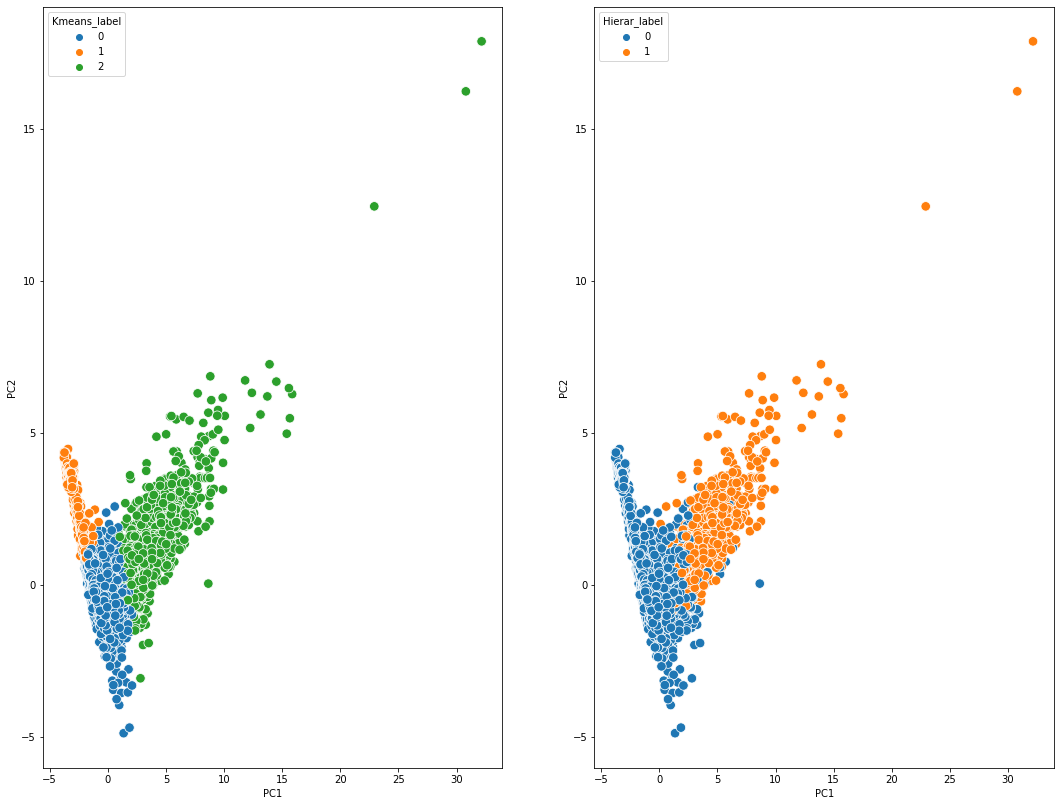

In [234]:

plt.figure(figsize = (28, 14))

plt.subplot(1,3,1)
sns.scatterplot(x = 'PC1', y = 'PC2', data = df_pca,  s = 90, hue = df['Kmeans_label'], palette = 'tab10')

plt.subplot(1,3,2)
sns.scatterplot(x = 'PC1', y = 'PC2', data = df_pca,  s = 90, hue = df['Hierar_label'], palette = 'tab10')


# display the plot
plt.show()

#### Both the clustering techinques almost giving the same kind of result 